# Wavelet Based Interpolation using Coefficient Averaging
### Setting
#### 1. Task
Suppose there are $C = \{c_1, \ldots, c_n \}$ signal channels coming from the same source system. Suppose that a subset $C_{bad} \subseteq C$ of these channels are determined to be 'bad' by some other method (broken sensor, badly placed sensor, too much noise, ect). We would like to attempt to recover the signals from the bad channels via an interpolation method.

#### 2. Loss Function
$\mathcal{L}(c) = \sum_{j \in N(c)} \sqrt{ \sum_{i = 1}^n (c[i] - c_j[i] )^2 } * \frac{\delta_{c, c_j}}{\sum_{j \in N(c)} \delta_{c, c_j}}$.

We take a weighted (by normalized great circle distance) sum of the squared error of the channel to interpolate and its closest neighbors (how many neighbors is a parameter).

#### 3. Statistical Goal
We would like to interpolate the bad channels as to minimize the sum of the loss functions over each bad channel.

#### 4. Computational Goal

#### 5. Desirata

bad chan = 0 , closest = [  6 121] , distances = [ 0.20756849  0.24878   ] num levels = 16
bad chan = 10 , closest = [16 17] , distances = [ 0.12531442  0.15410048] num levels = 16
bad chan = 20 , closest = [16 19] , distances = [ 0.10345026  0.16677115] num levels = 16
bad chan = 30 , closest = [126  24] , distances = [ 0.20540646  0.27198194] num levels = 16
bad chan = 40 , closest = [45 35] , distances = [ 0.22448265  0.29970937] num levels = 16
bad chan = 50 , closest = [49 51] , distances = [ 0.21465566  0.24052156] num levels = 16


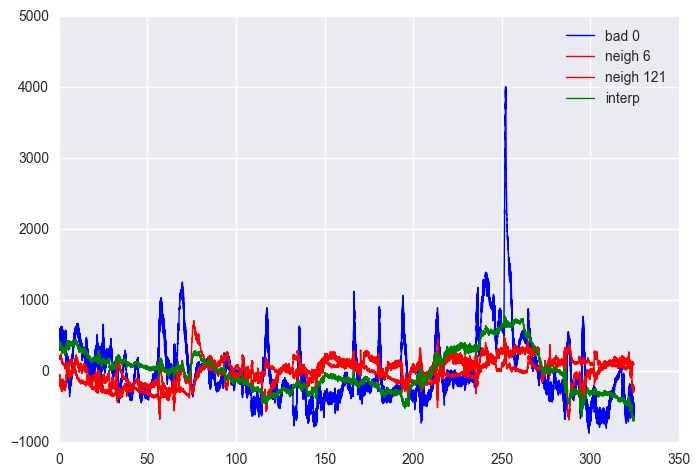

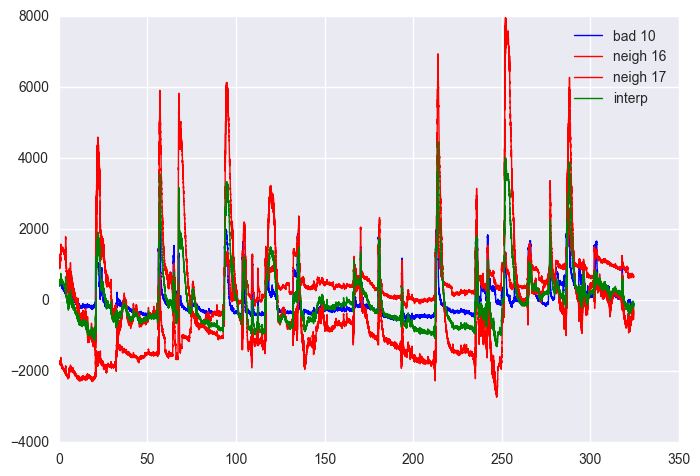

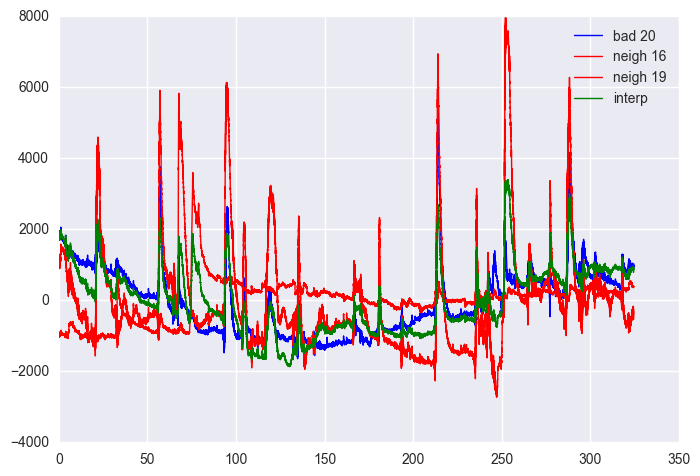

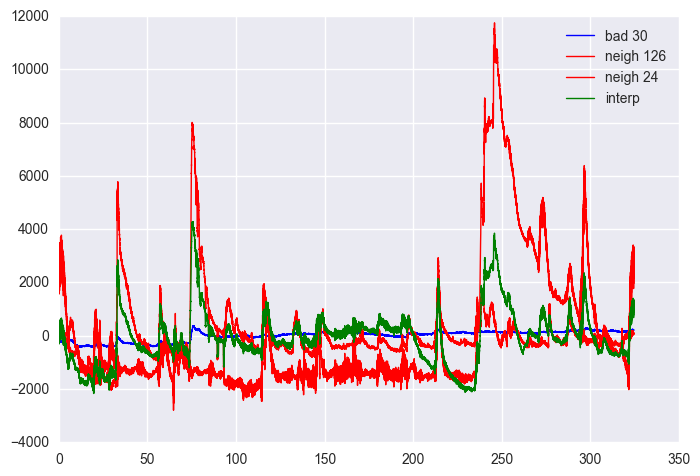

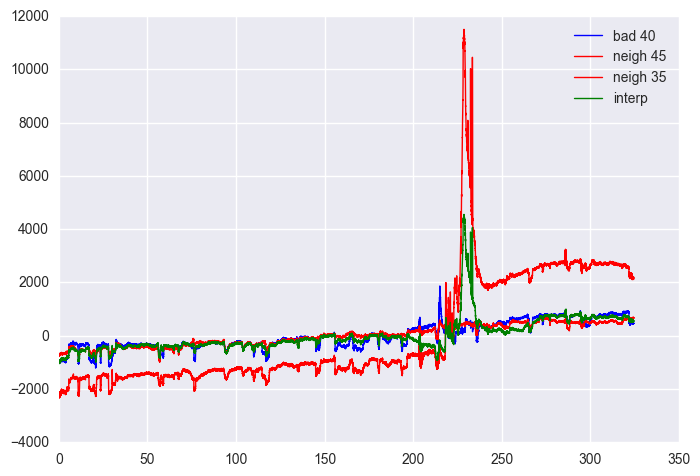

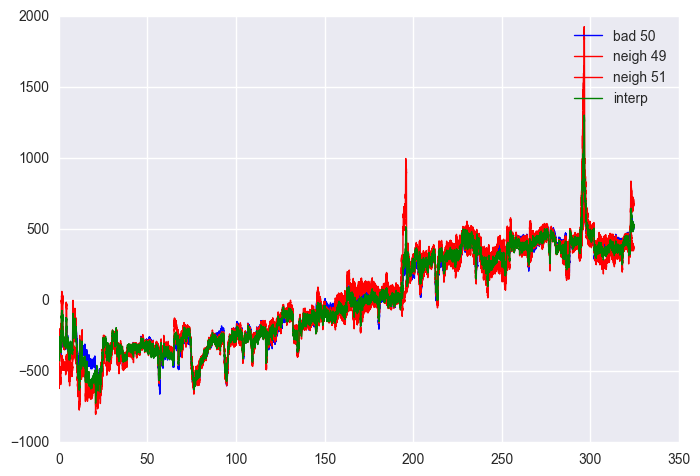

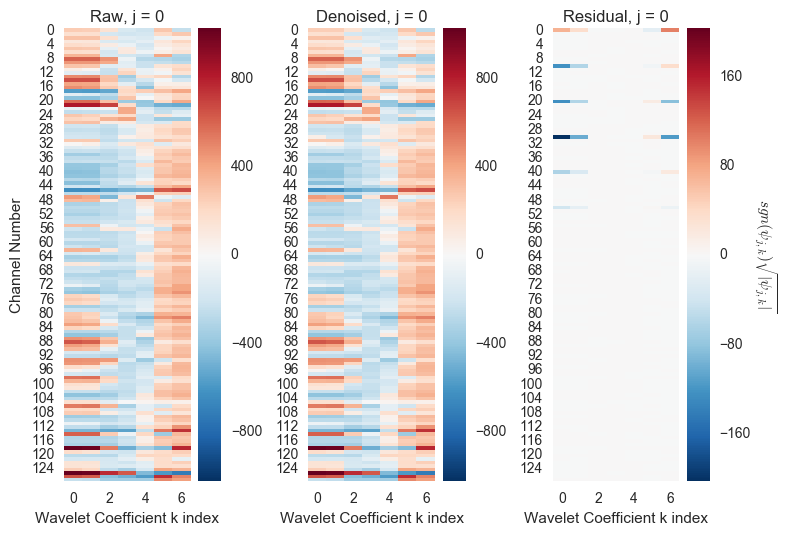

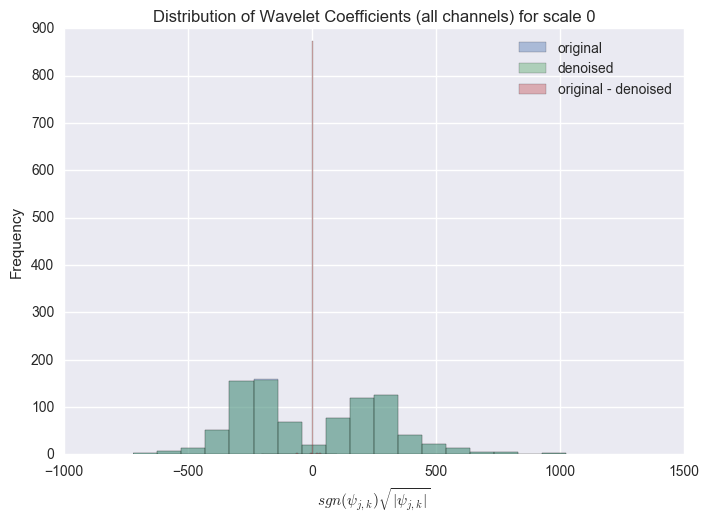

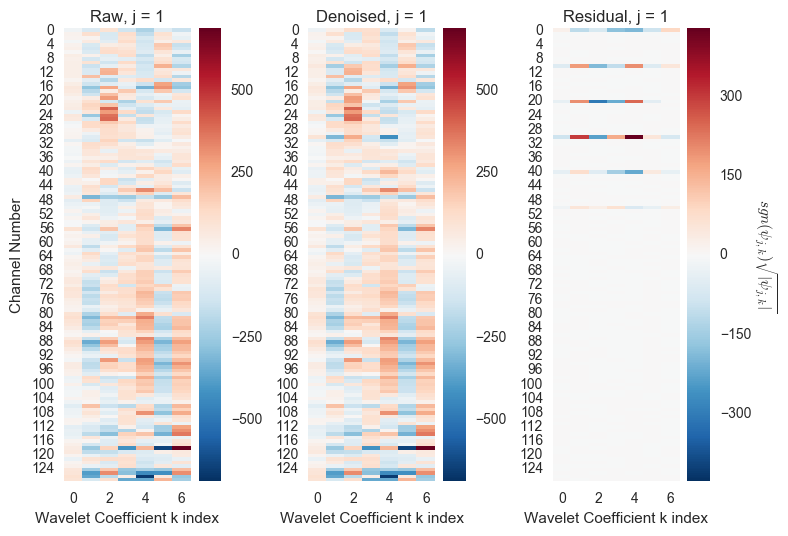

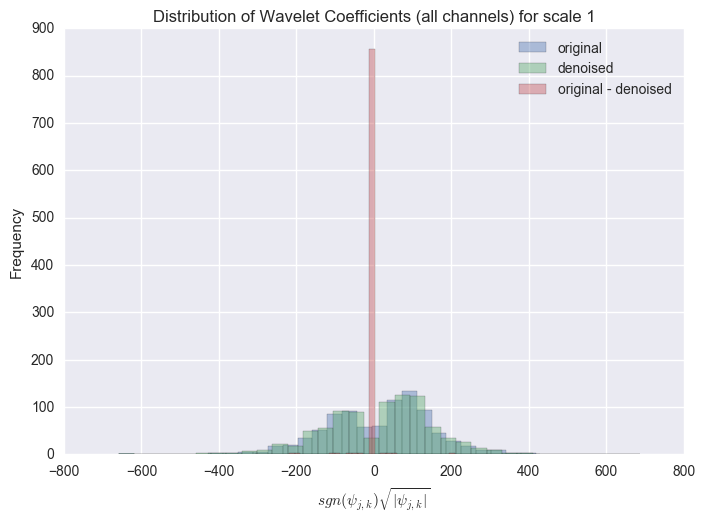

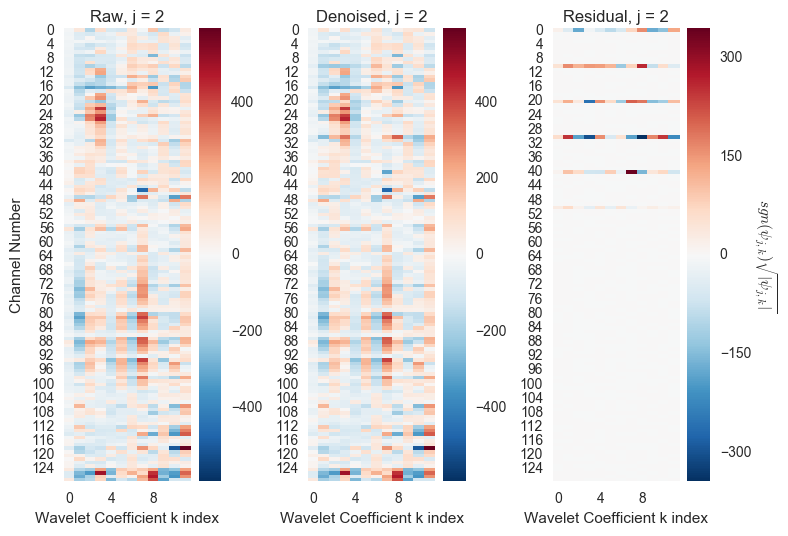

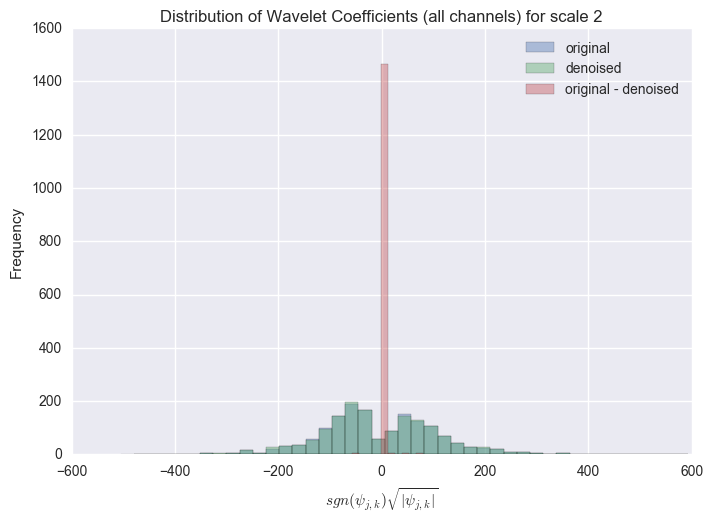

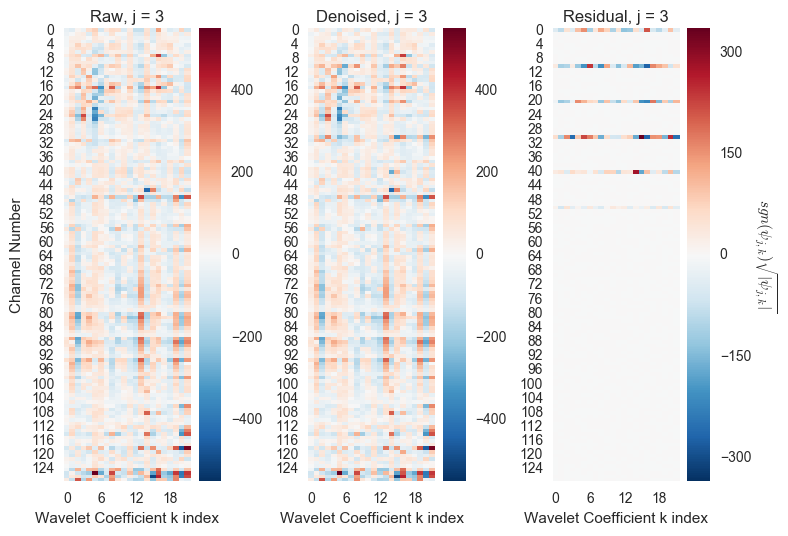

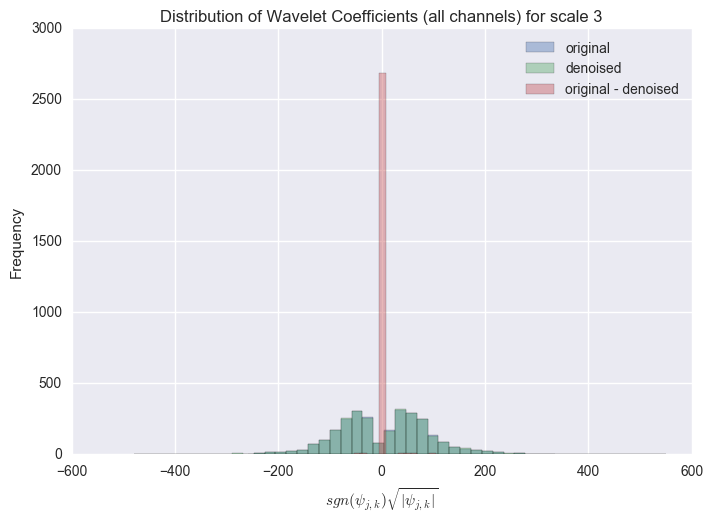

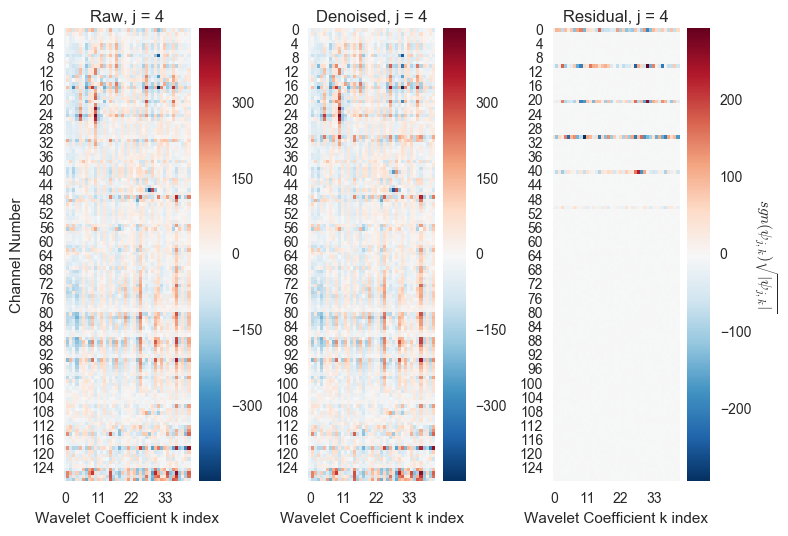

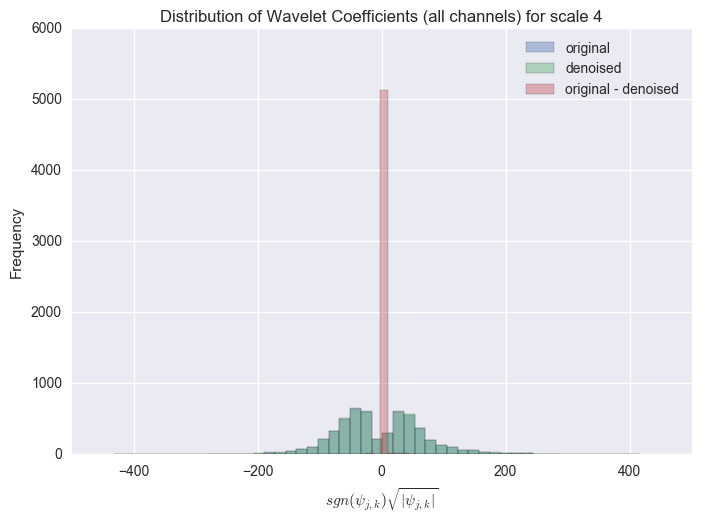

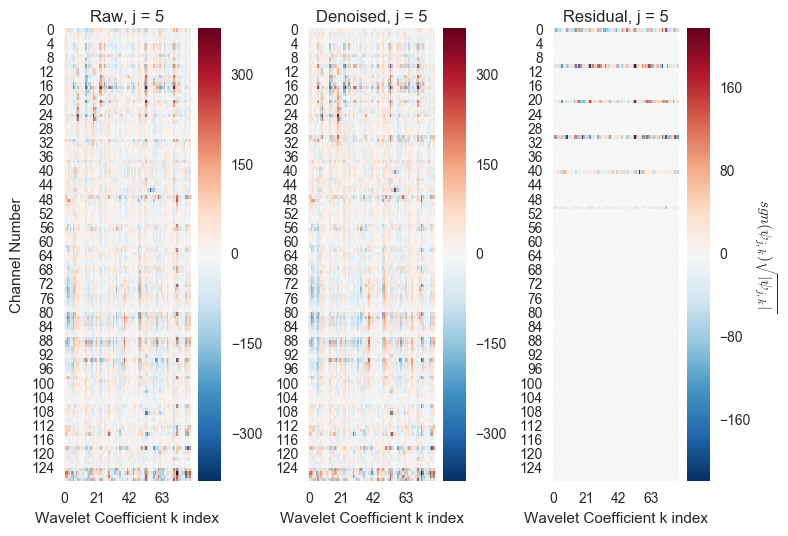

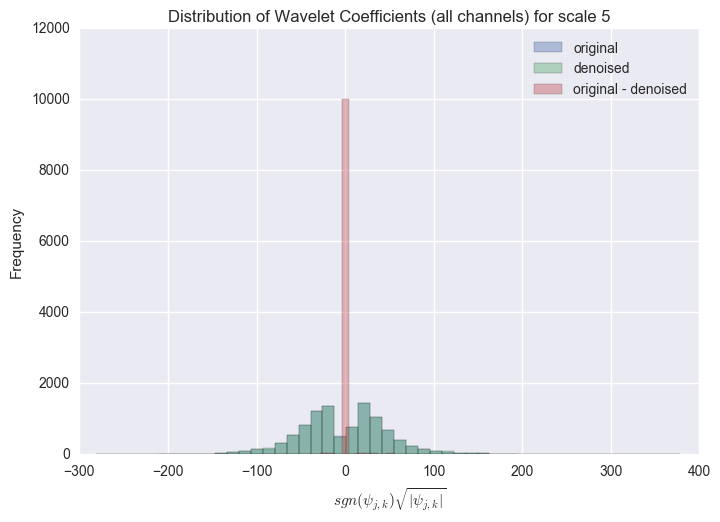

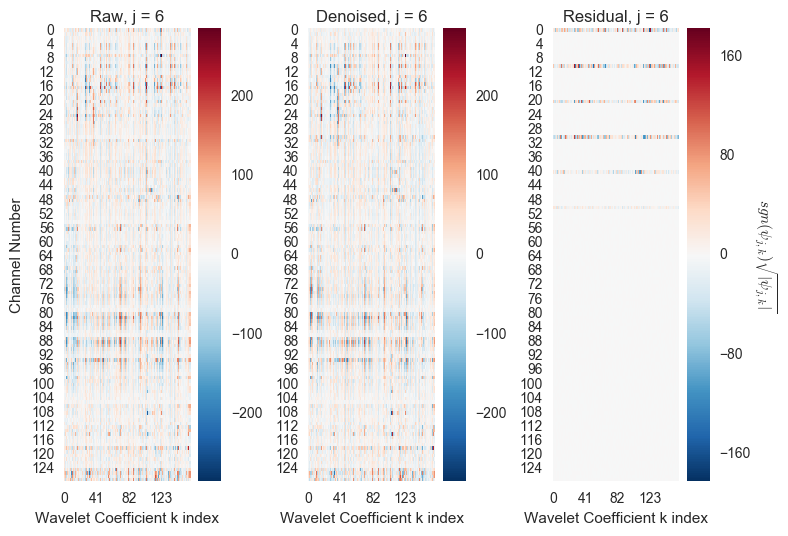

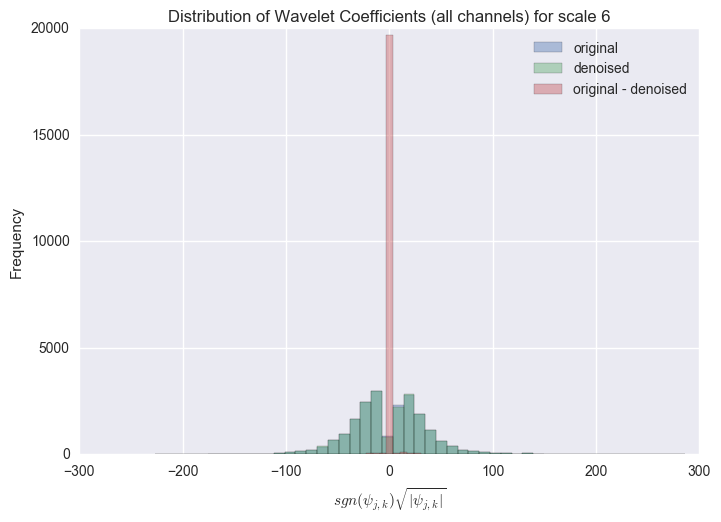

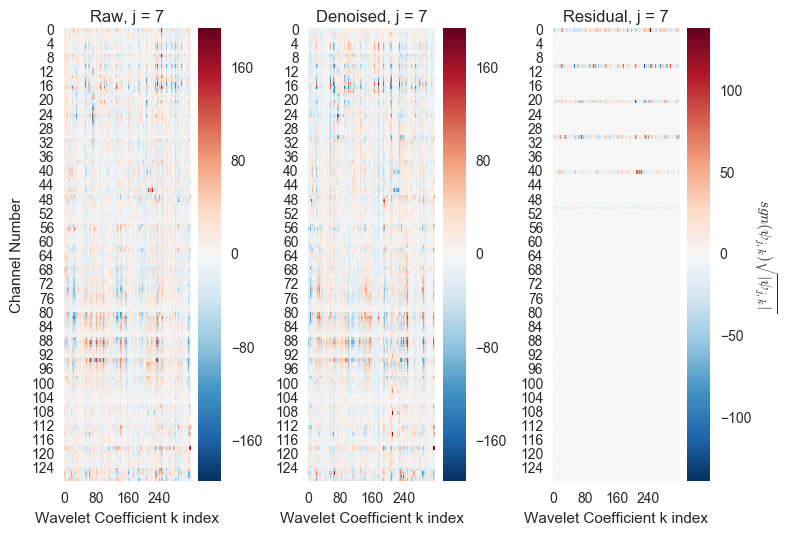

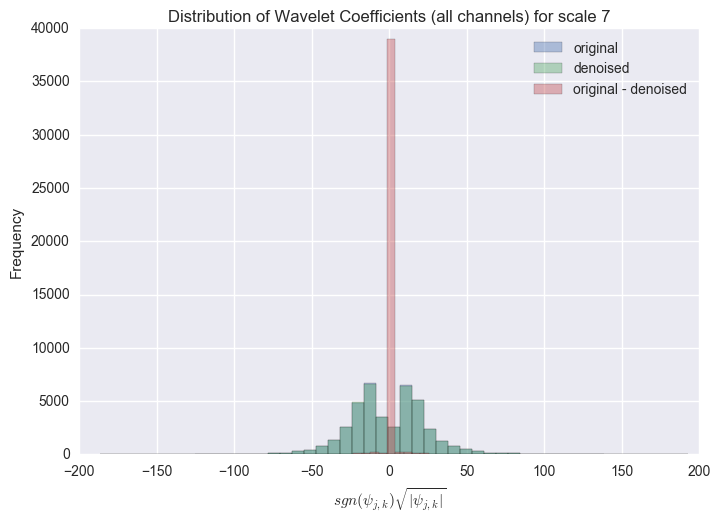

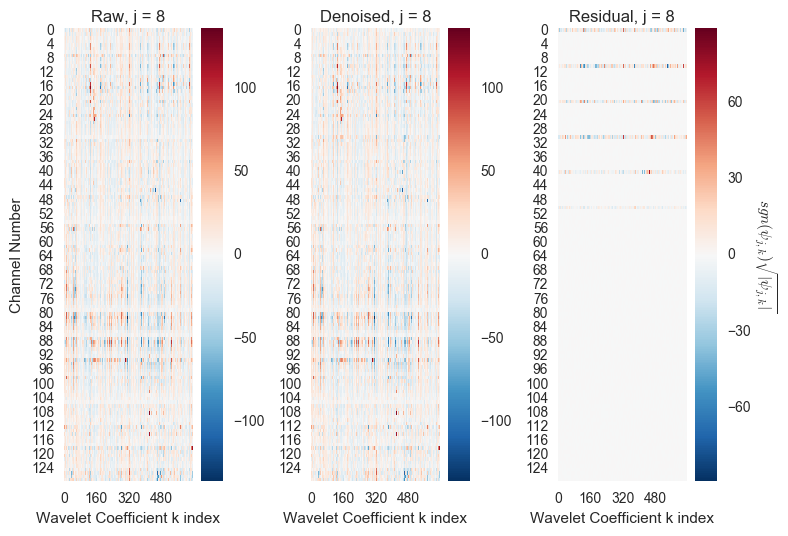

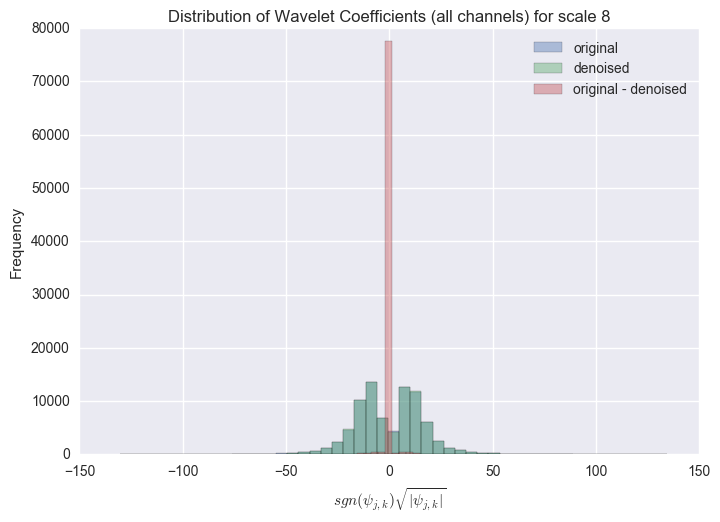

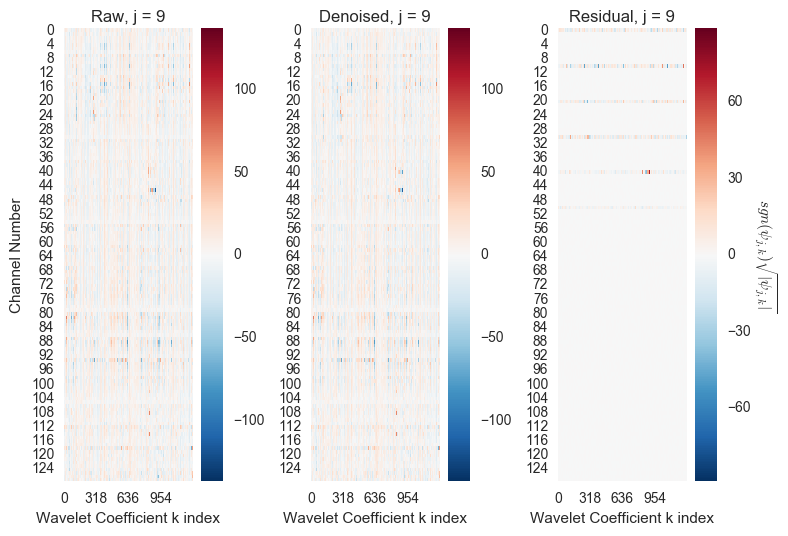

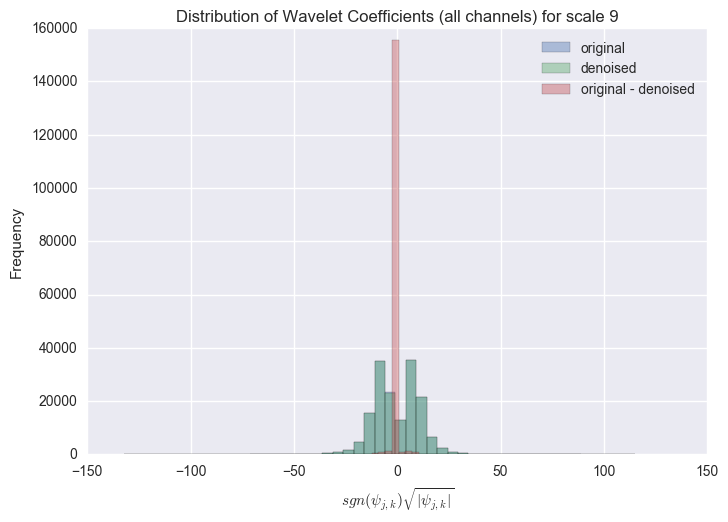

In [1]:
import pywt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cPickle as pkl
import pandas as pd
import cufflinks as cf
import sys
sys.path
sys.path.append('../..')
with open('../../../data/locs.tsv', 'r') as f_handle:
    chan_locs = pd.read_csv(f_handle, delimiter='\t').as_matrix()
    chan_locs = np.array(chan_locs[3:, 1:])
with open('../../../data/sub-0001_trial-01.pkl', 'rb') as f_handle:
    f_real = pkl.load(f_handle)
    f_real = f_real - np.mean(f_real, axis = 1).reshape(-1, 1)
import cPickle as pkl
import bench
import bench.dataset_creation as dc           
import bench.disc_set as d_set          
import bench.utilities as ut
import bench.discriminibility as disc
import methods.viz as viz
import methods.denoise as den
import methods.interpolation as inter
import os
wave = 'db2'
params = {'p_global': {'chan_locs': chan_locs,
                       'wave': wave,
                       'k': 2,
                       'loc_unit': 'radians',
                       'verbose': True},
          'p_local': {}
} 
C = [pywt.wavedec(f_real[c, :], wave) for c in range(f_real.shape[0])]
f_real = inter.wavelet_coefficient_interp((f_real, [0, 10, 20, 30, 40, 50]), params['p_local'], params['p_global'])
C_den = [pywt.wavedec(f_real[c, :], wave) for c in range(f_real.shape[0])]
for i in range(10):
    viz.cross_compare(C, C_den, i)